In [18]:
import matplotlib
matplotlib.use('Agg')
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
from matplotlib import *
import matplotlib as mpl
from IPython.display import Image

In [3]:
import cPickle as pkl
from performance_aggregator import ranking_stats
import performance_aggregator
performance_aggregator = reload(performance_aggregator)

In [ ]:
f = open('/export/b15/prastog3/catpeople_ls.ppcfg~0.expcfg~16.pkl')
self = pkl.load(f)

In [29]:
record = self.record
TM = self.TM
urls = self.url_list
limit = self.limit
cats = record.keys()

In [47]:
self2 = performance_aggregator.Aggregator(None, None, None, None, None)
def fmt(lst):
    if isinstance(lst, float) or isinstance(lst, int):
        return '%.3f'%lst
    return ['%.3f'%e for e in lst]

def get(scratch):
    coef = scratch['coef']
    intercept = scratch['intercept']
    features = scratch['features']
    return coef.T, intercept, features

def get_feat(cat):
    scores, scratch = record[cat][0]
    coef, intercept, features = get(scratch)
    nnz = coef.nonzero()[0]
    nv = zip(self.TM[[features[e] for e in nnz]], [e[0] for e in coef[nnz]])
    nv.sort(key=lambda x: x[1], reverse=True)
    test_stats = ranking_stats(self2.convert(scores, keepout='train'))[::2]
    train_stats = ranking_stats(self2.convert(scores, keepout='test'))[::2]
    return nv, test_stats, train_stats

In [66]:
cat_to_stat = []
for cat in cats:
    nv, test_stats, train_stats = get_feat(cat)
    # cat_to_stat.append([cat, test_stats[0], test_stats[-1], train_stats[0], train_stats[-1]])
    #cat_to_stat.append([cat, test_stats[1], train_stats[1]]) # P@10
    cat_to_stat.append([cat, test_stats[0], train_stats[0]]) # AP
    # cat_to_stat.append([cat, test_stats[-1], train_stats[-1]]) # MRR

In [67]:
print len(cat_to_stat)
cat_to_stat.sort(key=lambda x: x[2], reverse=True)
'''
for e in cat_to_stat[-1:]:
    print '%-21s'%e[0][:20] , e[1:]
    nv, _tes, _trs = get_feat(cat)
    print len(nv)
    pprint(nv)
'''    
for e in cat_to_stat:
    print '%-21s'%e[0][:20] , e[1:]

100
Mayflower_passengers  [1.0, 1.0]
World_Series_of_Poke  [1.0, 0.8369375480314909]
Zen_Buddhist_monks_a  [1.0, 0.80350436938299874]
Disciples_of_Gautama  [1.0, 0.76286627053574274]
Bare-knuckle_boxers   [1.0, 0.72271208582376789]
Social_Democratic_Pa  [1.0, 0.66144122433608465]
Toronto_city_council  [1.0, 0.59154688573347991]
Música_Popular_Bras  [1.0, 0.51785261800331439]
University_of_Tartu_  [1.0, 0.51557006597529098]
Aviators_killed_by_b  [1.0, 0.50894540957247336]
Olympic_silver_medal  [1.0, 0.50046024108455689]
National_Football_Le  [1.0, 0.46971216197913968]
Recipients_of_the_Sa  [1.0, 0.45719152539923347]
Mexican_Roman_Cathol  [1.0, 0.44798179255610804]
Frank_Zappa           [1.0, 0.43147132974656149]
Members_of_the_Liber  [1.0, 0.42906794949191263]
Filipino_female_sing  [1.0, 0.42692159936914137]
Martial_arts_writers  [1.0, 0.40033524863574871]
National_Football_Le  [1.0, 0.39181353967174054]
Italian_artists       [1.0, 0.38901741516296046]
Members_of_the_North  [1.0, 0.3776

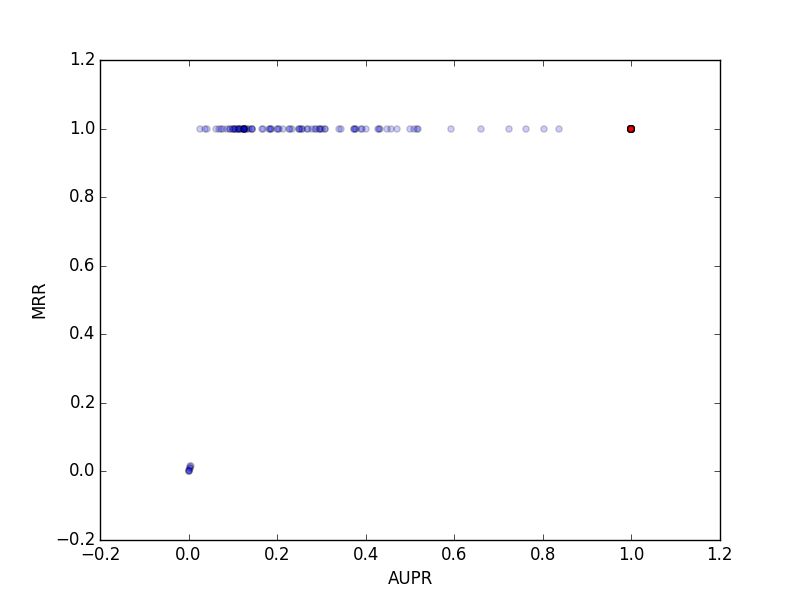

In [56]:
filename='figures/ppcfg~0.expcfg~16.cat_to_ap_mrr.png'
for cat, te_ap, te_mr, tr_ap, tr_mr in cat_to_stat:
    plt.scatter(te_ap, te_mr, c='red', alpha=0.2)
    plt.scatter(tr_ap, tr_mr, c='blue', alpha=0.2)
    pass
plt.xlabel('AUPR')
plt.ylabel('MRR')
plt.savefig(filename)
plt.close()
Image(filename=filename)